# Property Price Prediction

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQk9FRRgfStH9UxW7O7evOF7vein57Jl6xAn0uGhQ8BRizV-JfX&s" height='400px' width='100%'><br/>






## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Importing Packages](#section2)<br>
3. [Loading Data](#section3)
  - 3.1 [Description of the Datasets](#section301)
  - 3.2 [Pandas Profiling before Data Preprocessing](#section302)
4. [Data Preprocessing](#section4)<br>
  - 4.1 [Filling missing values](#section401)<br>
  - 4.2 [Remove highly correlated columns](#section402)<br>
  - 4.3 [Handling Outliers](#section403)<br>
  - 4.4 [Pandas Profiling after Data Preprocessing](#section404)<br>
5. [Data preparation for model building](#section5)<br>
  - 5.1 [Dummification / One-Hot Encoding](#section501)<br>
  - 5.2 [Standardizing independent variables](#section502)<br>
  - 5.3 [Seperating independant and target variables](#section503)<br>
6. [Ensemble Modelling and Prediction](#section6)<br>  
  - 6.1 [Linear Regression](#section601)
      - 6.1.1 [Checking assumptions of Linear Regression](#section60101)
      - 6.1.2 [Using Default Model](#section60102)
          - 6.1.2.1 [Building Model and Predictionl](#section6010201)
          - 6.1.2.2 [Model Evaluation](#section6010202)
      - 6.1.3 [Using GridSearchCV](#section60103)
          - 6.1.2.1 [Building Model and Predictionl](#section6010301)
          - 6.1.2.2 [Model Evaluation](#section6010301)
       - 6.1.4 [Using RandomSearchCV](#section60104)
          - 6.1.2.1 [Building Model and Predictionl](#section6010401)
          - 6.1.2.2 [Model Evaluation](#section6010401)
  - 6.2 [Decision Tree](#section602)
      - 6.2.1 [Using Default Model](#section60201)
          - 6.2.1.1 [Building Model and Predictionl](#section6020101)
          - 6.2.1.2 [Model Evaluation](#section6020102)
      - 6.2.2 [Using GridSearchCV](#section60202)
          - 6.2.2.1 [Building Model and Predictionl](#section6020201)
          - 6.2.2.2 [Model Evaluation](#section6020202)
      - 6.2.3 [Using RandomSearchCV](#section60203)
          - 6.2.3.1 [Building Model and Predictionl](#section6020301)
          - 6.2.3.2 [Model Evaluation](#section6020302)
  - 6.3 [Random Forest](#section603)
      - 6.3.1 [Using Default Model](#section60301)
          - 6.3.1.1 [Building Model and Predictionl](#section6030101)
          - 6.1.2.2 [Model Evaluation](#section6030102)
      - 6.3.2 [Using GridSearchCV](#section60302)
          - 6.3.2.1 [Building Model and Predictionl](#section6030201)
          - 6.3.2.2 [Model Evaluation](#section6030202)
      - 6.3.3 [Using RandomSearchCV](#section60303)
          - 6.3.3.1 [Building Model and Predictionl](#section6030301)
          - 6.3.3.2 [Model Evaluation](#section6030302)
7.  [Conclusion](#section7)<br>

<a id=section1></a>
# 1. Problem Statement

There are a number of factors which determine property prices, some are logical,
based on economic theories and population density and some are based on more
intangible factors, like availability of amenities & necessities, neighborhood, etc.


Build a multiple regression models(Linear Regression, Decision Trees, Random Forest ) to predict the price of the property from the dataset
having attributes such as sale type, sale condition etc.


<a id=section2></a>
# 2. Importing Packages

In [361]:
import numpy as np                     

import pandas as pd

# To suppress pandas warnings.
pd.set_option('mode.chained_assignment', None) 

# To display all the data in each column
pd.set_option('display.max_colwidth', -1)         

pd.get_option("display.max_rows",10000)

# To display every column of the dataset in head()
pd.options.display.max_columns = 100               

import warnings
warnings.filterwarnings('ignore')     

In [362]:
import matplotlib.pyplot as plt
%matplotlib inline

# To apply seaborn styles to the plots.
import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      

<a id=section3></a>

# 3. Loading Data

In [363]:
# loading data from csv file to a data frame
df_property_price = pd.read_csv('Property_Price_Train.csv', index_col = "Id")

In [364]:
#check whether data loaded properly or not
df_property_price.head()

,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Kitchen_Quality,Rooms_Above_Grade,Functional_Rate,Fireplaces,Fireplace_Quality,Garage,Garage_Built_Year,Garage_Finish_Year,Garage_Size,Garage_Area,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RLD,65.0,8450,Paved,NaN,Reg,Lvl,AllPub,I,GS,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,SS,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PC,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,TF,0,NaN,Attchd,2003.0,RFn,2,1085.793744,TA,TA,Y,163.788080,69.596115,20.337934,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RLD,80.0,9600,Paved,NaN,Reg,Lvl,AllPub,FR2P,GS,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,SS,MetalSd,MetalSd,None,0.0,TA,TA,CB,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,TF,1,TA,Attchd,1976.0,RFn,2,196.316304,TA,TA,Y,198.900074,74.716033,15.039392,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RLD,68.0,11250,Paved,NaN,IR1,Lvl,AllPub,I,GS,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,SS,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PC,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,TF,1,TA,Attchd,2001.0,RFn,2,218.068403,TA,TA,Y,26.127533,32.085268,-46.232198,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RLD,60.0,9550,Paved,NaN,IR1,Lvl,AllPub,C,GS,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,SS,Wd Sdng,Wd Shng,None,0.0,TA,TA,BT,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,TF,1,Gd,Detchd,1998.0,Unf,3,696.996439,TA,TA,Y,46.948018,40.181415,60.921821,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RLD,84.0,14260,Paved,NaN,IR1,Lvl,AllPub,FR2P,GS,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,SS,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PC,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,TF,1,TA,Attchd,2000.0,RFn,3,568.859882,TA,TA,Y,-10.626105,20.755323,21.788818,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<a id=section301></a>
## 3.1 Description of the Datasets

In [365]:
# checking shape of data
df_property_price.shape

(1459, 80)

In [366]:
df_property_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1 to 1459
Data columns (total 80 columns):
Building_Class               1459 non-null int64
Zoning_Class                 1459 non-null object
Lot_Extent                   1200 non-null float64
Lot_Size                     1459 non-null int64
Road_Type                    1459 non-null object
Lane_Type                    91 non-null object
Property_Shape               1459 non-null object
Land_Outline                 1459 non-null object
Utility_Type                 1459 non-null object
Lot_Configuration            1459 non-null object
Property_Slope               1459 non-null object
Neighborhood                 1459 non-null object
Condition1                   1459 non-null object
Condition2                   1459 non-null object
House_Type                   1459 non-null object
House_Design                 1459 non-null object
Overall_Material             1459 non-null int64
House_Condition              1459 non-null int6

In [367]:
df_property_price.describe()

,Building_Class,Lot_Extent,Lot_Size,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Brick_Veneer_Area,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Rooms_Above_Grade,Fireplaces,Garage_Built_Year,Garage_Size,Garage_Area,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Price
count,1459.000000,1200.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1451.00000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1378.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,56.922550,70.045833,10517.225497,6.100069,5.575051,1971.272104,1984.879369,103.75672,443.374914,46.382454,567.535984,1057.293352,1162.562714,347.230295,5.848526,1515.641535,0.424949,0.057574,1.565456,0.382454,2.866347,1.046607,6.518163,0.613434,1978.515965,1.767649,470.934787,93.015667,47.811902,24.580227,3.411926,15.071282,2.760795,43.518849,6.322138,2007.815627,180944.102810
std,42.304033,24.294456,9984.675721,1.383171,1.113125,30.212814,20.645927,181.10815,456.142186,161.248500,441.874057,438.824912,386.712553,436.583480,48.639512,525.616607,0.518870,0.238830,0.550906,0.502798,0.816050,0.220410,1.625894,0.644687,24.696004,0.747301,210.668787,124.796682,67.467586,61.353507,29.327247,55.775138,40.191018,496.291826,2.704540,1.328542,79464.918335
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.00000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,-129.369350,-338.112031,-187.149958,-164.807386,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7549.000000,5.000000,5.000000,1954.000000,1967.000000,0.00000,0.000000,0.000000,223.500000,795.500000,882.000000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,329.290489,9.656026,1.843186,-16.807302,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129950.000000
50%,50.000000,69.000000,9477.000000,6.000000,5.000000,1973.000000,1994.000000,0.00000,383.000000,0.000000,479.000000,991.000000,1086.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,471.028116,92.803628,46.837919,25.026953,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11603.000000,7.000000,6.000000,2000.000000,2004.000000,166.00000,712.000000,0.000000,808.000000,1298.500000,1391.500000,728.000000,0.000000,1777.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,607.184977,180.335986,96.523486,66.237591,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.00000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1147.488093,572.298709,255.362547,225.762714,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


 <a id=section302></a>
## 3.2 Pandas Profiling before Data Preprocessing

In [368]:
# To install pandas profiling please run this command.

#!pip install pandas-profiling --upgrade

In [369]:
#import pandas_profiling

# Running pandas profiling to get better understanding of data
#df_property_price.profile_report(title='Pandas Profiling before Data Preprocessing', style={'full_width':True})

 <a id=section4></a>
# 4. Data Preprocessing

 <a id=section401></a>
## 4.1 Filling missing values

**NOTE:**
1. Drop all columns with 70% or more missing values.
2. Fill remaining missing column values with median(continuous) or mode(categorical) depending on data.


In [370]:
column_names = list(df_property_price.columns)
column_names.remove('Sale_Price')

In [371]:
columns_to_be_dropped = list()
for i in range(0,len(column_names)):
  if(df_property_price[column_names[i]].isna().any()):
    
    # calculating missing percentage for each column
    missing_count = sum(df_property_price[column_names[i]].isna())
    total_count = len(df_property_price[column_names[i]])
    missing_percent = (missing_count/total_count)*100
  

    # add column name to `columns_to_be_dropped` 
    # if missing percentage is greater than 70
    if(missing_percent >= 70):
      columns_to_be_dropped.append(column_names[i])
    else:

      # checking datatype of each column so that we know 
      # which value to be replaced in missing value(median/mode)
      if(df_property_price[column_names[i]].dtype == 'object'):
        value_to_be_filled = df_property_price[column_names[i]].mode()[0]
        df_property_price[column_names[i]].fillna(value_to_be_filled, inplace=True)
      elif(df_property_price[column_names[i]].dtype == 'float64' or df_property_price[column_names[i]].dtype == 'int64'):
         value_to_be_filled = df_property_price[column_names[i]].median()
         df_property_price[column_names[i]].fillna(value_to_be_filled, inplace=True)

# droping all columns who have more than 70% missing values
df_property_price.drop(columns_to_be_dropped, axis=1, inplace=True)

In [372]:
df_property_price.shape

(1459, 76)

**Observations:** We have dropped four columns

In [373]:
df_property_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1 to 1459
Data columns (total 76 columns):
Building_Class               1459 non-null int64
Zoning_Class                 1459 non-null object
Lot_Extent                   1459 non-null float64
Lot_Size                     1459 non-null int64
Road_Type                    1459 non-null object
Property_Shape               1459 non-null object
Land_Outline                 1459 non-null object
Utility_Type                 1459 non-null object
Lot_Configuration            1459 non-null object
Property_Slope               1459 non-null object
Neighborhood                 1459 non-null object
Condition1                   1459 non-null object
Condition2                   1459 non-null object
House_Type                   1459 non-null object
House_Design                 1459 non-null object
Overall_Material             1459 non-null int64
House_Condition              1459 non-null int64
Construction_Year            1459 non-null int

**Observations:**

We don't have any missing values now. Good to go.

 <a id=section402></a>
## 4.2 Remove highly correlated independant columns

In [374]:
# extracting feature columns
feature_cols = list(df_property_price.columns)
feature_cols.remove('Sale_Price')
feature_cols

['Building_Class',
 'Zoning_Class',
 'Lot_Extent',
 'Lot_Size',
 'Road_Type',
 'Property_Shape',
 'Land_Outline',
 'Utility_Type',
 'Lot_Configuration',
 'Property_Slope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'House_Type',
 'House_Design',
 'Overall_Material',
 'House_Condition',
 'Construction_Year',
 'Remodel_Year',
 'Roof_Design',
 'Roof_Quality',
 'Exterior1st',
 'Exterior2nd',
 'Brick_Veneer_Type',
 'Brick_Veneer_Area',
 'Exterior_Material',
 'Exterior_Condition',
 'Foundation_Type',
 'Basement_Height',
 'Basement_Condition',
 'Exposure_Level',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'Total_Basement_Area',
 'Heating_Type',
 'Heating_Quality',
 'Air_Conditioning',
 'Electrical_System',
 'First_Floor_Area',
 'Second_Floor_Area',
 'LowQualFinSF',
 'Grade_Living_Area',
 'Underground_Full_Bathroom',
 'Underground_Half_Bathroom',
 'Full_Bathroom_Above_Grade',
 'Half_Bathroom_Above_Grade',
 'Bedroom_Above_Grade',
 'Kitchen_Above_Grade',
 

In [375]:
# extracting highly correlated columns(except target variable) to drop

# Create correlation matrix
corr_matrix = df_property_price[feature_cols].corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.80
cols_to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]
cols_to_drop

['First_Floor_Area', 'Rooms_Above_Grade', 'Garage_Built_Year']

In [376]:
# Drop features 
df_property_price.drop(cols_to_drop, axis=1, inplace=True)
df_property_price.shape

(1459, 73)

**Observations:** 

We dropped 'First_Floor_Area', 'Rooms_Above_Grade'. So, we are left with 74 columns.

 <a id=section403></a>
## 4.3 Handling Outliers

Concept of outliers is only applicable to continuous variables.

NOTE:

1. Remove ouliers if percentage is less than 2%

2. Fill remaining outliers values with median(continuous) or mode(categorical) depending on data.



In [377]:
# storing columns with continuos datatype in 'continuos_cols' 
continuos_cols = list()
cols = df_property_price.columns

for i in range(0,len(cols)):
  if(df_property_price[cols[i]].dtype != 'object'):
    continuos_cols.append(cols[i])

len(continuos_cols)

34

In [378]:
for i in range(0, len(continuos_cols)):
  df_temp = df_property_price[continuos_cols[i]]
  sorted(df_temp)
  q1, q3= np.percentile(df_temp,[10,95])
  iqr = q3 - q1
  lower_bound = q1 -(1.5 * iqr) 
  upper_bound = q3 +(1.5 * iqr) 
  true_index = df_temp.loc[(df_temp < lower_bound) & \
            (df_temp > upper_bound)].any()

  print(true_index)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


**Observations:** We don't have any outliers in the data.

 <a id=section404></a>
## 4.4 Pandas Profiling after Data Preprocessing

In [379]:

# Running pandas profiling to get better understanding of data
#df_property_price.profile_report(title='Pandas Profiling after Data Preprocessing', style={'full_width':True})

In [380]:
df_property_price.shape

(1459, 73)

 <a id=section5></a>
# 5. Data preparation for model building

 <a id=section501></a>
## 5.1 Dummification / One-Hot Encoding

In [381]:
# save categorical columns to a variable

categorical_price_columns = list()
columns_in_df = df_property_price.columns

for i in range(0, len(columns_in_df)):
  if(df_property_price[columns_in_df[i]].dtype == 'object'):
    categorical_price_columns.append(columns_in_df[i])

len(categorical_price_columns)

39

In [382]:
df_property_price_dummies = pd.get_dummies(df_property_price, drop_first=True, columns = categorical_price_columns)
df_property_price_dummies.shape

(1459, 236)

**Observations:**
 
Columns count increase from 73 to 237.

Can we apply below thesis results?

http://proceedings.mlr.press/v7/niculescu09/niculescu09.pdf


**Summary:**

<img src="/one-hot-encoding.png" height='200px' width='100%'><br/>

In [383]:
# lets look at how many unique labels each category has
for i in range(0, len(categorical_price_columns)):
  print(categorical_price_columns[i], " - ", df_property_price[categorical_price_columns[i]].nunique())

Zoning_Class  -  5
Road_Type  -  2
Property_Shape  -  4
Land_Outline  -  4
Utility_Type  -  2
Lot_Configuration  -  5
Property_Slope  -  3
Neighborhood  -  25
Condition1  -  9
Condition2  -  8
House_Type  -  5
House_Design  -  8
Roof_Design  -  6
Roof_Quality  -  8
Exterior1st  -  15
Exterior2nd  -  16
Brick_Veneer_Type  -  4
Exterior_Material  -  4
Exterior_Condition  -  5
Foundation_Type  -  6
Basement_Height  -  4
Basement_Condition  -  4
Exposure_Level  -  4
BsmtFinType1  -  6
BsmtFinType2  -  6
Heating_Type  -  6
Heating_Quality  -  5
Air_Conditioning  -  2
Electrical_System  -  5
Kitchen_Quality  -  4
Functional_Rate  -  8
Fireplace_Quality  -  5
Garage  -  7
Garage_Finish_Year  -  3
Garage_Quality  -  5
Garage_Condition  -  5
Pavedd_Drive  -  3
Sale_Type  -  9
Sale_Condition  -  6


**Observations:**

As there are very few columns which has more than 10 categories, we can skip this step.

In [384]:
#delete original columns as dummificaton of them is done
#df_property_price_dummies.drop(categorical_price_columns, axis = 1, inplace=True)
#assign data frame after dummification to original data frame
df_property_price = df_property_price_dummies
df_property_price.shape

(1459, 236)

 <a id=section502></a>
 ## 5.2 Standardizing

In [385]:
# extracting feature columns again
feature_cols = list(df_property_price.columns)
feature_cols.remove('Sale_Price')
len(feature_cols)

235

In [386]:
from sklearn.preprocessing import StandardScaler

# standardizing of  data
scaler = StandardScaler().fit(df_property_price[feature_cols])
data_train = scaler.transform(df_property_price[feature_cols])

In [387]:
# forming dataframe after standardization
df_property_price_sd= pd.DataFrame(data_train)
df_property_price_sd.columns = feature_cols
df_property_price_sd.head()

,Building_Class,Lot_Extent,Lot_Size,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Brick_Veneer_Area,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Fireplaces,Garage_Size,Garage_Area,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Zoning_Class_FVR,Zoning_Class_RHD,Zoning_Class_RLD,Zoning_Class_RMD,Road_Type_Paved,Property_Shape_IR2,Property_Shape_IR3,Property_Shape_Reg,Land_Outline_HLS,Land_Outline_Low,Land_Outline_Lvl,Utility_Type_NoSeWa,Lot_Configuration_CulDSac,Lot_Configuration_FR2P,Lot_Configuration_FR3P,Lot_Configuration_I,Property_Slope_MS,...,Air_Conditioning_Y,Electrical_System_FuseF,Electrical_System_FuseP,Electrical_System_Mix,Electrical_System_SBrkr,Kitchen_Quality_Fa,Kitchen_Quality_Gd,Kitchen_Quality_TA,Functional_Rate_MD1,Functional_Rate_MD2,Functional_Rate_MS,Functional_Rate_MajD1,Functional_Rate_MajD2,Functional_Rate_SD,Functional_Rate_TF,Fireplace_Quality_Fa,Fireplace_Quality_Gd,Fireplace_Quality_Po,Fireplace_Quality_TA,Garage_2Types,Garage_Attchd,Garage_Basment,Garage_BuiltIn,Garage_CarPort,Garage_Detchd,Garage_Finish_Year_RFn,Garage_Finish_Year_Unf,Garage_Quality_Fa,Garage_Quality_Gd,Garage_Quality_Po,Garage_Quality_TA,Garage_Condition_Fa,Garage_Condition_Gd,Garage_Condition_Po,Garage_Condition_TA,Pavedd_Drive_P,Pavedd_Drive_Y,Sale_Type_CWD,Sale_Type_Con,Sale_Type_ConLD,Sale_Type_ConLI,Sale_Type_ConLw,Sale_Type_New,Sale_Type_Oth,Sale_Type_WD,Sale_Condition_AdjLand,Sale_Condition_Alloca,Sale_Condition_Family,Sale_Condition_Normal,Sale_Condition_Partial
0,0.072771,-0.220644,-0.207111,0.650852,-0.516787,1.050507,0.877986,0.513594,0.575950,-0.287744,-0.945245,-0.458867,1.161160,-0.120284,0.369899,1.108656,-0.241148,0.789052,1.228641,0.163837,-0.211529,-0.951848,0.311027,2.919606,0.567296,0.322995,-0.069169,-0.11638,-0.270308,-0.068715,-0.087718,-1.598653,0.138826,-0.215936,-0.1053,0.518359,-0.419124,0.06426,-0.170041,-0.083074,0.760923,-0.188378,-0.159056,0.337254,-0.026189,-0.26242,-0.182445,-0.052432,0.623058,-0.215936,...,0.263909,-0.137313,-0.045392,-0.026189,0.30611,-0.165725,1.220558,-1.006188,-0.147339,-0.154466,-0.026189,-0.098431,-0.058641,-0.026189,0.271263,-0.152124,0.604009,-0.117892,-0.522613,-0.026189,0.731976,-0.114867,-0.253351,-0.078784,-0.600839,1.567592,-0.942046,-0.184441,-0.098431,-0.045392,0.221101,-0.156776,-0.078784,-0.069433,0.194154,-0.144892,0.299365,-0.052432,-0.03705,-0.078784,-0.058641,-0.058641,-0.302075,-0.045392,0.390447,-0.052432,-0.091066,-0.117892,0.467847,-0.30611
1,-0.873090,0.460330,-0.091895,-0.072372,2.179252,0.156540,-0.430226,-0.571009,1.172460,-0.287744,-0.641887,0.466648,-0.795608,-0.120284,-0.482725,-0.819269,3.947370,0.789052,-0.760912,0.163837,-0.211529,0.599824,0.311027,-1.304003,0.848746,0.398908,-0.155559,-0.11638,-0.270308,-0.068715,-0.087718,-0.489027,-0.614137,-0.215936,-0.1053,0.518359,-0.419124,0.06426,-0.170041,-0.083074,0.760923,-0.188378,-0.159056,0.337254,-0.026189,-0.26242,5.481109,-0.052432,-1.604986,-0.215936,...,0.263909,-0.137313,-0.045392,-0.026189,0.30611,-0.165725,-0.819298,0.993850,-0.147339,-0.154466,-0.026189,-0.098431,-0.058641,-0.026189,0.271263,-0.152124,-1.655604,-0.117892,1.913463,-0.026189,0.731976,-0.114867,-0.253351,-0.078784,-0.600839,1.567592,-0.942046,-0.184441,-0.098431,-0.045392,0.221101,-0.156776,-0.078784,-0.069433,0.194154,-0.144892,0.299365,-0.052432,-0.03705,-0.078784,-0.058641,-0.058641,-0.302075,-0.045392,0.390447,-0.052432,-0.091066,-0.117892,0.467847,-0.30611
2,0.072771,-0.084449,0.073415,0.650852,-0.516787,0.984287,0.829534,0.325449,0.093479,-0.287744,-0.302307,-0.312973,1.188656,-0.120284,0.514541,1.108656,-0.241148,0.789052,1.228641,0.163837,-0.211529,0.599824,0.311027,-1.200715,-0.536161,-0.233179,-1.154567,-0.116

 <a id=section503></a>
 ## 5.3 Seperating independant and target variables.

In [388]:
X = df_property_price_sd[feature_cols]
y = df_property_price['Sale_Price']

 <a id=section6></a>
 # 6. Ensemble Modelling and Prediction
 
 Ensemble modeling is a process where multiple diverse models are created to predict an outcome, either by using many different modeling algorithms or using different training data sets. The ensemble model then aggregates the prediction of each base model and results in once final prediction for the unseen data.

 <a id=section601></a>
 ## 6.1 Linear Regression
 
 
Linear regression is a basic and commonly used type of predictive analysis.  The overall idea of regression is to examine two things: 

1. Does a set of predictor variables do a good job in predicting an outcome (dependent) variable?  
2. Which variables in particular are significant predictors of the outcome variable, and in what way do they–indicated by the magnitude and sign of the beta estimates–impact the outcome variable?  

These regression estimates are used to explain the relationship between one dependent variable and one or more independent variables.  The simplest form of the regression equation with one dependent and one independent variable is defined by the formula y = c + b*x, where y = estimated dependent variable score, c = constant, b = regression coefficient, and x = score on the independent variable.


 <a id=section60101></a>
### 6.1.1  Checking assumptions of Linear Regression

#### a. Target variable should be normally distributed


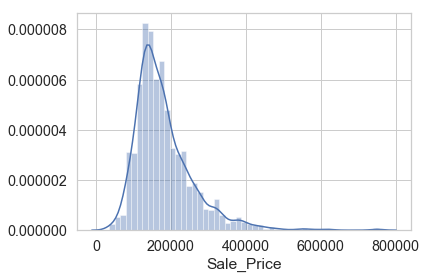

In [389]:
house_price = y
sns.distplot(house_price, color="b")

**Observations**

1. We observe target variable i.e; Sale_Price is not normally distributed
2. Lets apply log transformation and check.

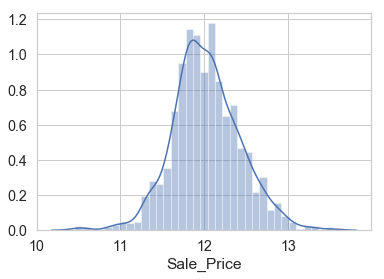

In [390]:
house_price_log= np.log(df_property_price['Sale_Price'])
sns.distplot(house_price_log, color="b")

**Observations:** Log transformation worked. Lets check another assumption.

In [391]:
y_lr = pd.DataFrame({'Sale_Price':house_price_log})

#### b. Independant variables shouldn't be correlated

**NOTE:**

Above assumption is taken care in [Remove highly correlated columns](#section402). Moving forward.

#### c.  Independant variables and target variable should have linear relation

In [392]:
#Selecting feature columns
feature_cols = list(df_property_price.columns)
feature_cols.remove('Sale_Price')
cols_to_drop = list()

# iterating through feature columns and collecting all columns 
# who have less than 0.1 correlation with target variable
for i in range(0, len(feature_cols)):
    corr_matrix = df_property_price[['Sale_Price', feature_cols[i]]].corr().abs()
    if(corr_matrix.iloc[0][1] < 0.1):
        cols_to_drop.append(feature_cols[i])

#dropping all uncorrelated columns
X.drop(cols_to_drop, axis = 1, inplace=True)
X.shape

(1459, 100)

**NOTE:**

Dropped all columns who have less than **0.1 correlation** with target variable.

#### Standardizing target variable 

In [393]:
# standardizing of  data
scaler = StandardScaler().fit(y_lr)
data_train = scaler.transform(y_lr)
y_lr = pd.DataFrame(data_train)
y_lr.columns = ['Sale_Price']
y_lr.head()

,Sale_Price
0,0.559684
1,0.212488
2,0.733609
3,-0.437456
4,1.014126


##### Splitting data again as target variable is transformed


In [394]:
from sklearn.model_selection import train_test_split

def split(X,y):
    return train_test_split(X, y, test_size=0.30, random_state=1)

In [395]:
X_train_lr, X_test_lr, y_train_lr, y_test_lr=split(X,y_lr)
print('Train cases as below')
print('X_train shape: ',X_train_lr.shape)
print('y_train shape: ',y_train_lr.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test_lr.shape)
print('y_test shape: ',y_test_lr.shape)

Train cases as below
X_train shape:  (1021, 100)
y_train shape:  (1021, 1)

Test cases as below
X_test shape:  (438, 100)
y_test shape:  (438, 1)


##### Defining Linear Regression function for modelling

In [396]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

def linear_reg(gridsearch = False):
    linreg = LinearRegression() 
    if not(gridsearch):
        parameters = {'normalize':[True,False], 'copy_X':[True, False]}
        linreg = RandomizedSearchCV(linreg,parameters, cv = 10,refit = True)                                                    
        return linreg
    else:
        parameters = {'normalize':[True,False], 'copy_X':[True, False]}
        linreg = GridSearchCV(linreg,parameters, cv = 10,refit = True)                                                    
        return linreg

 <a id=section60102></a>
### 6.1.2 Using Default Model

 <a id=section6010201></a>
#### 6.1.2.1 Building Model and Prediction

In [397]:
linreg = LinearRegression()
linreg.fit(X_train_lr,y_train_lr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [398]:
# print the intercept and coefficients
print('Intercept:',linreg.intercept_)
print('Coefficients:',linreg.coef_)  

Intercept: [0.00137119]
Coefficients: [[ 0.02196932  0.04042537  0.19563137 -0.03536634  0.07284802 -0.01745066
   0.02260645 -0.04738338  0.11394268 -0.01054544  0.31503422  0.02875322
   0.02671552  0.02518128  0.04564736 -0.04601009  0.05738952  0.09354338
   0.03568217  0.11610412  0.09613647  0.01017427 -0.00593289  0.01264868
   0.02770824 -0.03495325 -0.02461054 -0.07359167 -0.06499851 -0.05669677
  -0.0514914   0.02295093  0.05593392 -0.07465846 -0.02676027  0.08281016
   0.04292426  0.00048895  0.01018389  0.05813916  0.01050609 -0.01708496
  -0.08852616 -0.07603942  0.02016449  0.02224993 -0.01906286  0.03682458
   0.03523171 -0.02258544  0.00930454 -0.01903895 -0.01483756  0.02357508
   0.05553557  0.06538428  0.03310436 -0.01538276 -0.00787146  0.00849178
  -0.03590183 -0.01293148  0.03208748  0.04641802  0.01141923 -0.00248356
  -0.02931981 -0.03117475  0.04222383 -0.01383245  0.01135638 -0.00237159
   0.00755671 -0.02374915 -0.02389762 -0.02395517 -0.04156932  0.04533936


In [399]:
 # make predictions on the training set
y_pred_train_lr = linreg.predict(X_train_lr) 

In [400]:
 # make predictions on the testing set
y_pred_test_lr = linreg.predict(X_test_lr)  

 <a id=section6010202></a>
#### 6.1.2.2 Model Evaluation

#### a. RMSE


In [401]:
from sklearn import metrics
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train_lr, y_pred_train_lr))
print('RMSE for training set is {}'.format(RMSE_train))

RMSE_test = np.sqrt( metrics.mean_squared_error(y_test_lr, y_pred_test_lr))
print('RMSE for testing set is {}'.format(RMSE_test))

RMSE for training set is 0.28684154883787094
RMSE for testing set is 0.43461700018562915


#### b. MAPE


In [402]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [403]:
mape_train_error = mean_absolute_percentage_error(y_train_lr, y_pred_train_lr)
mape_test_error = mean_absolute_percentage_error(y_test_lr, y_pred_test_lr)
print('MAPE for training set is {}'.format(mape_train_error))
print('MAPE for testing set is {}'.format(mape_test_error))

MAPE for training set is 87.61960261973294
MAPE for testing set is 115.40138914017707


#### c. R-Squared Error

In [404]:
from sklearn.metrics import r2_score

r_squared_train_lr = r2_score(y_train_lr,y_pred_train_lr )
print('R-Squared for training set is {}'.format(r_squared_train_lr))

R-Squared for training set is 0.9175731671839207


In [405]:
r_squared_test_lr = r2_score(y_test_lr,y_pred_test_lr )
print('R-Squared for testing set is {}'.format(r_squared_test_lr))

R-Squared for testing set is 0.8113768233535005


#### d. Adjusted R-Squared Error

In [406]:
adjusted_r_squared_train_lr = 1 - (1-r_squared_train_lr)*(len(y_train_lr)-1)/(len(y_train_lr)-X_train_lr.shape[1]-1)
print('Adjusted R-Squared for training set is {}'.format(adjusted_r_squared_train_lr))

Adjusted R-Squared for training set is 0.9086137288343469


In [407]:
adjusted_r_squared_test_lr = 1 - (1-r_squared_test_lr)*(len(y_test_lr)-1)/(len(y_test_lr)-X_train_lr.shape[1]-1)
print('Adjusted R-Squared for testing set is {}'.format(adjusted_r_squared_test_lr))

Adjusted R-Squared for testing set is 0.7554055543189309


 <a id=section60103></a>
### 6.1.3 Using GridSearchCV

 <a id=section6010301></a>
#### 6.1.3.1 Building Model and Prediction

In [408]:
linreg_gs = linear_reg(True)
linreg_gs.fit(X_train_lr,y_train_lr)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'normalize': [True, False], 'copy_X': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [409]:
linreg_gs

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'normalize': [True, False], 'copy_X': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [410]:
print("best_params after cross-validation : ", linreg_gs.best_params_)   

best_params after cross-validation :  {'copy_X': True, 'normalize': False}


In [411]:
 # make predictions on the training set
y_pred_train_lr_gs = linreg_gs.predict(X_train_lr) 

In [412]:
 # make predictions on the testing set
y_pred_test_lr_gs = linreg_gs.predict(X_test_lr)  

 <a id=section6010302></a>
#### 6.1.3.2 Model Evaluation

#### a. RMSE


In [413]:
from sklearn import metrics
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train_lr, y_pred_train_lr_gs))
print('RMSE for training set is {}'.format(RMSE_train))

RMSE_test = np.sqrt( metrics.mean_squared_error(y_test_lr, y_pred_test_lr_gs))
print('RMSE for testing set is {}'.format(RMSE_test))

RMSE for training set is 0.28684154883787094
RMSE for testing set is 0.43461700018562915


#### b. MAPE


In [414]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [415]:
mape_train_error = mean_absolute_percentage_error(y_train_lr, y_pred_train_lr_gs)
mape_test_error = mean_absolute_percentage_error(y_test_lr, y_pred_test_lr_gs)
print('MAPE for training set is {}'.format(mape_train_error))
print('MAPE for testing set is {}'.format(mape_test_error))

MAPE for training set is 87.61960261973294
MAPE for testing set is 115.40138914017707


#### c. R-Squared Error

In [416]:
from sklearn.metrics import r2_score

r_squared_train_lr_gs = r2_score(y_train_lr,y_pred_train_lr_gs )
print('R-Squared for training set is {}'.format(r_squared_train_lr_gs))

R-Squared for training set is 0.9175731671839207


In [417]:
r_squared_test_lr_gs = r2_score(y_test_lr,y_pred_test_lr_gs )
print('R-Squared for testing set is {}'.format(r_squared_test_lr_gs))

R-Squared for testing set is 0.8113768233535005


#### d. Adjusted R-Squared Error

In [418]:
adjusted_r_squared_train_lr_gs = 1 - (1-r_squared_train_lr_gs)*(len(y_train_lr)-1)/(len(y_train_lr)-X_train_lr.shape[1]-1)
print('Adjusted R-Squared for training set is {}'.format(adjusted_r_squared_train_lr_gs))

Adjusted R-Squared for training set is 0.9086137288343469


In [419]:
adjusted_r_squared_test_lr_gs = 1 - (1-r_squared_test_lr_gs)*(len(y_test_lr)-1)/(len(y_test_lr)-X_train_lr.shape[1]-1)
print('Adjusted R-Squared for testing set is {}'.format(adjusted_r_squared_test_lr_gs))

Adjusted R-Squared for testing set is 0.7554055543189309


 <a id=section60104></a>
### 6.1.4 Using RandomSearchCV

 <a id=section6010401></a>
#### 6.1.4.1 Building Model and Prediction

In [420]:
linreg_rs = linear_reg(False)
linreg_rs.fit(X_train_lr,y_train_lr)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'normalize': [True, False], 'copy_X': [True, False]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [421]:
linreg_rs

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'normalize': [True, False], 'copy_X': [True, False]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [422]:
print("best_params after cross-validation : ", linreg_rs.best_params_)   

best_params after cross-validation :  {'normalize': False, 'copy_X': True}


In [423]:
 # make predictions on the training set
y_pred_train_lr_rs = linreg_rs.predict(X_train_lr) 

In [424]:
 # make predictions on the testing set
y_pred_test_lr_rs = linreg_rs.predict(X_test_lr)  

 <a id=section6010402></a>
#### 6.1.4.2 Model Evaluation

#### a. RMSE


In [425]:
from sklearn import metrics
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train_lr, y_pred_train_lr_rs))
print('RMSE for training set is {}'.format(RMSE_train))

RMSE_test = np.sqrt( metrics.mean_squared_error(y_test_lr, y_pred_test_lr_rs))
print('RMSE for testing set is {}'.format(RMSE_test))

RMSE for training set is 0.28684154883787094
RMSE for testing set is 0.43461700018562915


#### b. MAPE


In [426]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [427]:
mape_train_error = mean_absolute_percentage_error(y_train_lr, y_pred_train_lr_rs)
mape_test_error = mean_absolute_percentage_error(y_test_lr, y_pred_test_lr_rs)
print('MAPE for training set is {}'.format(mape_train_error))
print('MAPE for testing set is {}'.format(mape_test_error))

MAPE for training set is 87.61960261973294
MAPE for testing set is 115.40138914017707


#### c. R-Squared Error

In [428]:
from sklearn.metrics import r2_score

r_squared_train_lr_rs = r2_score(y_train_lr,y_pred_train_lr_rs )
print('R-Squared for training set is {}'.format(r_squared_train_lr_rs))

R-Squared for training set is 0.9175731671839207


In [429]:
r_squared_test_lr_rs = r2_score(y_test_lr,y_pred_test_lr_rs )
print('R-Squared for testing set is {}'.format(r_squared_test_lr_rs))

R-Squared for testing set is 0.8113768233535005


#### d. Adjusted R-Squared Error

In [430]:
adjusted_r_squared_train_lr_rs = 1 - (1-r_squared_train_lr_rs)*(len(y_train_lr)-1)/(len(y_train_lr)-X_train_lr.shape[1]-1)
print('Adjusted R-Squared for training set is {}'.format(adjusted_r_squared_train_lr_rs))

Adjusted R-Squared for training set is 0.9086137288343469


In [431]:
adjusted_r_squared_test_lr_rs = 1 - (1-r_squared_test_lr_rs)*(len(y_test_lr)-1)/(len(y_test_lr)-X_train_lr.shape[1]-1)
print('Adjusted R-Squared for testing set is {}'.format(adjusted_r_squared_test_lr_rs))

Adjusted R-Squared for testing set is 0.7554055543189309


 <a id=section602></a>
## 6.2 Decision Tree

 <a id=section60201></a>
### 6.2.1 Using Default Model

##### Splitting train and test data


In [432]:
X_train_dt, X_test_dt, y_train_dt, y_test_dt=split(X,y)
print('Train cases as below')
print('X_train shape: ',X_train_dt.shape)
print('y_train shape: ',y_train_dt.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test_dt.shape)
print('y_test shape: ',y_test_dt.shape)

Train cases as below
X_train shape:  (1021, 100)
y_train shape:  (1021,)

Test cases as below
X_test shape:  (438, 100)
y_test shape:  (438,)


 <a id=section6020101></a>
#### 6.2.1.1 Building Model and Prediction

In [433]:
from sklearn.tree import DecisionTreeRegressor

# using default model for building 
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train_dt, y_train_dt)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [434]:
#prediction on training data
y_pred_train_dt = dt_reg.predict(X_train_dt)

#prediction on testing data
y_pred_test_dt = dt_reg.predict(X_test_dt)

<a id=section6020102></a>
#### 6.2.1.2 Model Evaluation

#### a. RMSE


In [435]:
RMSE_train_dt = np.sqrt( metrics.mean_squared_error(y_train_dt, y_pred_train_dt))
print('RMSE for training set is {}'.format(RMSE_train_dt))

RMSE_test_dt = np.sqrt( metrics.mean_squared_error(y_test_dt, y_pred_test_dt))
print('RMSE for testing set is {}'.format(RMSE_test_dt))

RMSE for training set is 165.97145241471603
RMSE for testing set is 35486.57317755329


#### b. MAPE


In [436]:
mape_train_error = mean_absolute_percentage_error(y_train_dt, y_pred_train_dt)
mape_test_error = mean_absolute_percentage_error(y_test_dt, y_pred_test_dt)
print('MAPE for training set is {}'.format(mape_train_error))
print('MAPE for testing set is {}'.format(mape_test_error))

MAPE for training set is 0.005496462401457505
MAPE for testing set is 15.202026562831033


#### c. R-Squared Error

In [437]:
r_squared_train_dt = r2_score(y_train_dt,y_pred_train_dt )
print('R-Squared for training set is {}'.format(r_squared_train_dt))

R-Squared for training set is 0.9999958352065705


In [438]:
r_squared_test_dt = r2_score(y_test_dt,y_pred_test_dt )
print('R-Squared for testing set is {}'.format(r_squared_test_dt))

R-Squared for testing set is 0.7745612733432071


#### d. Adjusted R-Squared Error

In [439]:
adjusted_r_squared_train_dt = 1 - (1-r_squared_train_dt)*(len(y_train_dt)-1)/(len(y_train_dt)-X_train_dt.shape[1]-1)
print('Adjusted R-Squared for training set is {}'.format(adjusted_r_squared_train_dt))

Adjusted R-Squared for training set is 0.9999953825116326


In [440]:
adjusted_r_squared_test_dt = 1 - (1-r_squared_test_dt)*(len(y_test_dt)-1)/(len(y_test_dt)-X_train_dt.shape[1]-1)
print('Adjusted R-Squared for testing set is {}'.format(adjusted_r_squared_test_dt))

Adjusted R-Squared for testing set is 0.7076655087566217


 <a id=section60202></a>
### 6.2.2 Using GridSearchCV

 <a id=section6020201></a>
#### 6.2.2.1 Building Model and Prediction

In [441]:
from sklearn.model_selection import GridSearchCV

In [453]:
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
param_grid = {
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
}

In [454]:
# Instantiate the grid search model
dt_reg_gs = GridSearchCV(estimator = dt_reg, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [455]:
dt_reg_gs.fit(X_train_dt, y_train_dt)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 231 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 633 out of 648 | elapsed:   19.6s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 648 out of 648 | elapsed:   19.6s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [456]:
#prediction on training data
y_pred_train_dt_gs = dt_reg_gs.predict(X_train_dt)

#prediction on testing data
y_pred_test_dt_gs = dt_reg_gs.predict(X_test_dt)

<a id=section6020202></a>
#### 6.2.2.2 Model Evaluation

#### a. RMSE


In [457]:
RMSE_train_dt_gs = np.sqrt( metrics.mean_squared_error(y_train_dt, y_pred_train_dt_gs))
print('RMSE for training set is {}'.format(RMSE_train_dt_gs))

RMSE_test_dt_gs = np.sqrt( metrics.mean_squared_error(y_test_dt, y_pred_test_dt_gs))
print('RMSE for testing set is {}'.format(RMSE_test_dt_gs))

RMSE for training set is 20889.06040560536
RMSE for testing set is 40713.55292946244


#### b. MAPE


In [458]:
mape_train_error = mean_absolute_percentage_error(y_train_dt, y_pred_train_dt_gs)
mape_test_error = mean_absolute_percentage_error(y_test_dt, y_pred_test_dt_gs)
print('MAPE for training set is {}'.format(mape_train_error))
print('MAPE for testing set is {}'.format(mape_test_error))

MAPE for training set is 6.566364335617564
MAPE for testing set is 15.729330202792882


#### c. R-Squared Error

In [459]:
r_squared_train_dt_gs = r2_score(y_train_dt,y_pred_train_dt_gs )
print('R-Squared for training set is {}'.format(r_squared_train_dt_gs))

R-Squared for training set is 0.9340272651055773


In [460]:
r_squared_test_dt_gs = r2_score(y_test_dt,y_pred_test_dt_gs )
print('R-Squared for testing set is {}'.format(r_squared_test_dt_gs))

R-Squared for testing set is 0.7032584207946041


#### d. Adjusted R-Squared Error

In [461]:
adjusted_r_squared_train_dt_gs = 1 - (1-r_squared_train_dt_gs)*(len(y_train_dt)-1)/(len(y_train_dt)-X_train_dt.shape[1]-1)
print('Adjusted R-Squared for training set is {}'.format(adjusted_r_squared_train_dt_gs))

Adjusted R-Squared for training set is 0.9268563156605314


In [462]:
adjusted_r_squared_test_dt_gs = 1 - (1-r_squared_test_dt_gs)*(len(y_test_dt)-1)/(len(y_test_dt)-X_train_dt.shape[1]-1)
print('Adjusted R-Squared for testing set is {}'.format(adjusted_r_squared_test_dt_gs))

Adjusted R-Squared for testing set is 0.6152045397247536


 <a id=section60203></a>
### 6.2.3 Using RandomizedSearchCV

 <a id=section6020201></a>
#### 6.2.2.1 Building Model and Prediction

In [468]:
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]


# Create the random grid
random_grid = {
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
}


In [469]:
# Instantiate the random search model
dt_reg_rs = RandomizedSearchCV(estimator = dt_reg, param_distributions = random_grid, n_iter = 100, cv = 3, 
                               verbose=2, random_state=42, n_jobs = -1)

In [470]:
dt_reg_rs.fit(X_train_dt, y_train_dt)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   15.7s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [471]:
#prediction on training data
y_pred_train_dt_rs = dt_reg_rs.predict(X_train_dt)

#prediction on testing data
y_pred_test_dt_rs = dt_reg_rs.predict(X_test_dt)

<a id=section6020202></a>
#### 6.2.2.2 Model Evaluation

#### a. RMSE


In [472]:
RMSE_train_dt_rs = np.sqrt( metrics.mean_squared_error(y_train_dt, y_pred_train_dt_rs))
print('RMSE for training set is {}'.format(RMSE_train_dt_rs))

RMSE_test_dt_gs = np.sqrt( metrics.mean_squared_error(y_test_dt, y_pred_test_dt_rs))
print('RMSE for testing set is {}'.format(RMSE_test_dt_gs))

RMSE for training set is 20889.06040560536
RMSE for testing set is 40736.777687162474


#### b. MAPE


In [473]:
mape_train_error = mean_absolute_percentage_error(y_train_dt, y_pred_train_dt_rs)
mape_test_error = mean_absolute_percentage_error(y_test_dt, y_pred_test_dt_rs)
print('MAPE for training set is {}'.format(mape_train_error))
print('MAPE for testing set is {}'.format(mape_test_error))

MAPE for training set is 6.566364335617564
MAPE for testing set is 15.747760589379817


#### c. R-Squared Error

In [459]:
r_squared_train_dt_gs = r2_score(y_train_dt,y_pred_train_dt_gs )
print('R-Squared for training set is {}'.format(r_squared_train_dt_gs))

R-Squared for training set is 0.9340272651055773


In [460]:
r_squared_test_dt_gs = r2_score(y_test_dt,y_pred_test_dt_gs )
print('R-Squared for testing set is {}'.format(r_squared_test_dt_gs))

R-Squared for testing set is 0.7032584207946041


#### d. Adjusted R-Squared Error

In [461]:
adjusted_r_squared_train_dt_gs = 1 - (1-r_squared_train_dt_gs)*(len(y_train_dt)-1)/(len(y_train_dt)-X_train_dt.shape[1]-1)
print('Adjusted R-Squared for training set is {}'.format(adjusted_r_squared_train_dt_gs))

Adjusted R-Squared for training set is 0.9268563156605314


In [462]:
adjusted_r_squared_test_dt_gs = 1 - (1-r_squared_test_dt_gs)*(len(y_test_dt)-1)/(len(y_test_dt)-X_train_dt.shape[1]-1)
print('Adjusted R-Squared for testing set is {}'.format(adjusted_r_squared_test_dt_gs))

Adjusted R-Squared for testing set is 0.6152045397247536


 <a id=section603></a>
## 6.3 Random Forest

##### Splitting train and test data


In [452]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf=split(X,y)
print('Train cases as below')
print('X_train shape: ',X_train_rf.shape)
print('y_train shape: ',y_train_rf.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test_rf.shape)
print('y_test shape: ',y_test_rf.shape)

Train cases as below
X_train shape:  (1021, 100)
y_train shape:  (1021,)

Test cases as below
X_test shape:  (438, 100)
y_test shape:  (438,)


### 6.3.1 Building Model and Prediction

In [311]:
from sklearn.ensemble import RandomForestRegressor

# using default model for building
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train_rf, y_train_rf)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [315]:
y_pred_train_rf = rf_reg.predict(X_train_rf)
y_pred_test_rf = rf_reg.predict(X_test_rf)

### 6.3.2 Model Evaluation

#### a. RMSE


In [316]:
from sklearn import metrics
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train_rf, y_pred_train_rf))
print('RMSE for training set is {}'.format(RMSE_train))

RMSE_test = np.sqrt( metrics.mean_squared_error(y_test_rf, y_pred_test_rf))
print('RMSE for testing set is {}'.format(RMSE_test))

RMSE for training set is 13290.913166188602
RMSE for testing set is 27419.66278110427


#### b. MAPE


In [317]:
mape_train_error = mean_absolute_percentage_error(y_train_rf, y_pred_train_rf)
mape_test_error = mean_absolute_percentage_error(y_test_rf, y_pred_test_rf)
print('MAPE for training set is {}'.format(mape_train_error))
print('MAPE for testing set is {}'.format(mape_test_error))

MAPE for training set is 4.624750612553229
MAPE for testing set is 11.147195558450736


#### c. R-Squared Error

In [318]:
r_squared_train_rf = r2_score(y_train_rf,y_pred_train_rf )
print('R-Squared for training set is {}'.format(r_squared_train_rf))

R-Squared for training set is 0.9732923105437975


In [319]:
r_squared_test_rf = r2_score(y_test_rf,y_pred_test_rf )
print('R-Squared for testing set is {}'.format(r_squared_test_rf))

R-Squared for testing set is 0.8654063361399162


#### d. Adjusted R-Squared Error

In [320]:
adjusted_r_squared_train_rf = 1 - (1-r_squared_train_rf)*(len(y_train_rf)-1)/(len(y_train_rf)-X_train_rf.shape[1]-1)
print('Adjusted R-Squared for training set is {}'.format(adjusted_r_squared_train_rf))

Adjusted R-Squared for training set is 0.9703893008202973


In [321]:
adjusted_r_squared_test_rf = 1 - (1-r_squared_test_rf)*(len(y_test_rf)-1)/(len(y_test_rf)-X_train_rf.shape[1]-1)
print('Adjusted R-Squared for testing set is {}'.format(adjusted_r_squared_test_rf))

Adjusted R-Squared for testing set is 0.8254675634811377


In [107]:
# Null deviance
# Residual deviance
#RMSE  Actual +- RMSE